In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings

from helper import visualization
from matplotlib.colors import ListedColormap

warnings.filterwarnings('ignore')

np.random.seed(0)

In [2]:
from IPython.core.pylabtools import figsize
figsize(15, 5)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Training Deep Networks

* Gradient Descent
* Loss Functions
* Optimizers
* Regularization
* Augmentation
* Transfer Learning

# Gradient Descent

[![](https://i.ytimg.com/vi/bxe2T-V8XRs/maxresdefault.jpg)](https://youtu.be/5u0jaA3qAGk?t=23)



# Option 1: Random Search


* Randomly chose weights and check if they improve the cost


* Terribly ineffecient

* Backpropagation is more efficient than random search by a factor of the number of connections


# Option 2: Numerical Gradient

* **Intuition:** gradient describes rate of change of a function with respect to a variable surrounding an infinitesimally small region 
* **Finite differences**


\begin{equation}
    \frac{f(x+h) - f(x)}{h}
\end{equation}

* How do we compute the gradient independent of each input?


# Option 3: Analytical Gradient

* Chain rule

\begin{equation}
    z = f(y); y = g(x)
\end{equation}


\begin{equation}
    \frac{\partial z}{\partial x} = \frac{\partial z}{\partial y} \frac{\partial y}{\partial x}
\end{equation}


* We know the structure of the computational graph beforehand


# Why do we need to know this?

* Deep learning frameworks can automatically perform backprop!
* Problems might surface related to underlying gradients when debugging your models


* [Yes you should understand gradient descent](https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b)


# Problem Statement


\begin{equation}
    loss = f(x, y; \theta)
\end{equation}

* 


# Loss Functions
**Regression:**

* Mean Squared Error (MSE)
    * Penalizes outliers
* Mean Absolute Error (MAE)
    * Good when values are small

**Classification:**

* Binary Cross-Entropy 
    * Binary classification
* Categorical Cross-Entropy
    * Multiple categories (e.g. image classification)

# Mean Squared Error


\begin{equation}
    J = \frac{1}{2N} (y - \hat{y})^2
\end{equation}

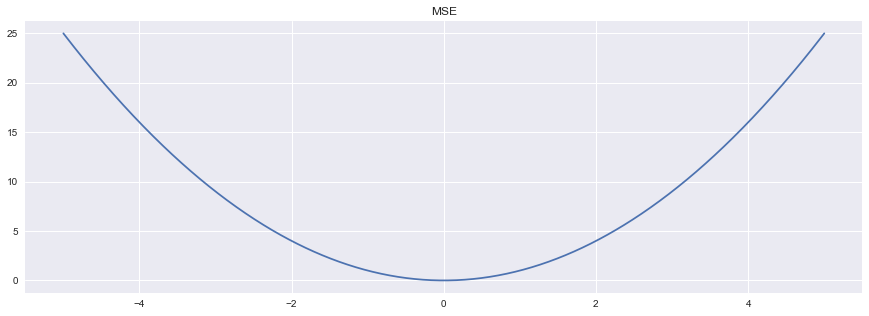

In [4]:
x = np.linspace(-5, 5, 1000); y = x**2
plt.plot(x,y); plt.title('MSE'); plt.show()

# Mean Absolute Error


\begin{equation}
    J = \frac{1}{2N} |y - \hat{y}|
\end{equation}

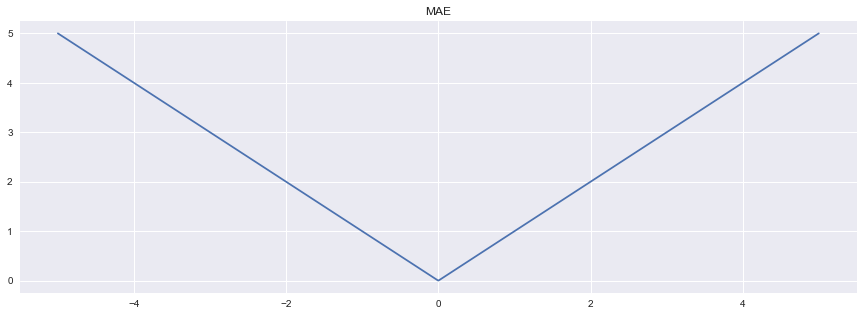

In [5]:
x = np.linspace(-5, 5, 1000); y = np.abs(x)

plt.plot(x,y); plt.title('MAE'); plt.show()


# 

* Should be familiar from logistic regression


\begin{equation}
    \sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}

# Binary Crossentropy (Negative Log Likelihood)

\begin{equation}
    J = - y \log(\hat{y}) - (1-y) \log(1 - \hat{y})
\end{equation}

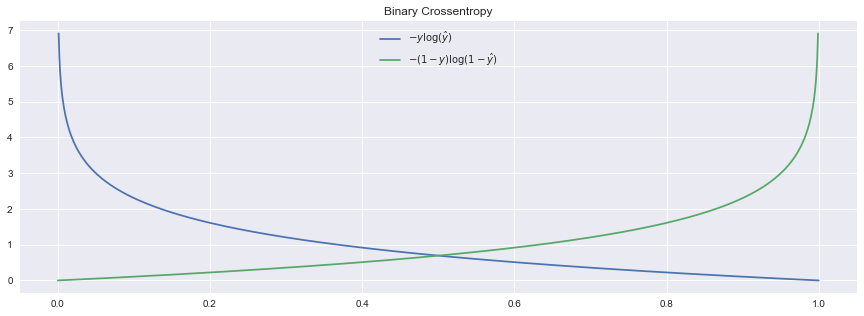

In [6]:
x = np.linspace(0, 1, 1000)

plt.plot(x,-np.log(x), label='$-y\log(\hat{y})$')
plt.plot(x,-np.log(1-x), label='$-(1-y)\log(1-\hat{y})$')
plt.title('Binary Crossentropy'); plt.legend(); plt.show()

# Softmax  

\begin{equation}
    \hat{y_i} = \frac{e^{z_i}}{\sum_{j=1}^N e^{z_j}} 
\end{equation}

* Output sums to one
* Represent probability distribution across discrete mutually exclusive alternatives

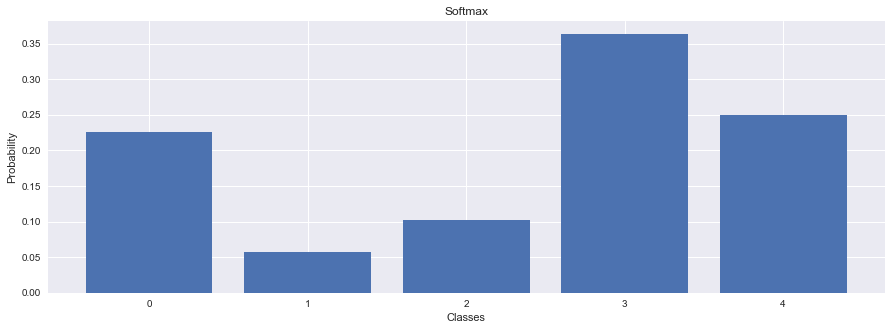

In [7]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

x = np.random.randn(5); y = softmax(x)
plt.bar(np.arange(5), y); plt.xlabel('Classes'); plt.ylabel('Probability'); plt.title('Softmax'); plt.show()

# Softmax Derivative

\begin{equation}
    \frac{\partial \hat{y_i}}{\partial z_i} = \hat{y_i} ( 1 - \hat{y_i})
\end{equation}

# Cross-entropy Cost Function
* Generic case for many classes
* Convince yourself this is the same thing as binary crossentropy (i.e. two classes)

\begin{equation}
    J = - \sum_j y_j \log \hat{y_j}
\end{equation}

\begin{equation}
    \frac{\partial J}{\partial z_i} = - \sum_j \frac{\partial J}{\partial \hat{y_i}} \frac{\partial \hat{y_i}}{\partial z_i} = \hat{y_i} - y_i
\end{equation}

In [8]:
def cost(y_hat, y):
    return y_hat - y

# Optimizers

# Mini-batch SGD Loop:
1. Sample a batch of data
2. Forward prop it through the graph (network), get loss
3. Backprop to calculate the gradients
4. Update the parameters using the gradient

# SGD
* Because we use minibatches gradients can be noisy

\begin{equation}
    \theta_{t+1} = \theta_t - \alpha \nabla J(\theta)
\end{equation}

\begin{equation}
    J(\theta) = \frac{1}{N} \sum_{i=1}^{N} J_i (x_i, y_i, \theta)
\end{equation}

\begin{equation}
    \nabla_{\theta} J(\theta) = \frac{1}{N} \sum_{i=1}^{N} \nabla_{\theta}  J_i (x_i, y_i, \theta)
\end{equation}

# Momentum
* Use direction of gradients to push us forward
* Helps to avoid local minima

Momentum usually is $\rho = 0.9$ 

\begin{equation}
    v_{t+1} = \rho v_t + \nabla J(\theta)
\end{equation}

\begin{equation}
    \theta_{t+1} = \theta_t - \alpha v_{t+1}
\end{equation}

# AdaGrad
* Element wise scaling of gradient based on past sum of squares in each dimension
* Adaptive learning rate

In [9]:
grad_squared = 0
while True:
    dtheta = compute_gradients(theta)
    grad_squared += dtheta * dtheta
    
    theta -= learning_rate * dtheta / (np.sqrt(grad_squared) 1+e-7)

SyntaxError: invalid syntax (<ipython-input-9-e142f68c850b>, line 6)

# RMSProp

In [ ]:
grad_squared = 0
while True:
    dtheta = compute_gradients(theta)
    grad_squared += dtheta * dtheta
    
    theta -= learning_rate * dtheta / (np.sqrt(grad_squared) 1+e-7)

# Adam

# Optimizers
![](https://cdn-images-1.medium.com/max/1600/0*o9jCrrX4umP7cTBA)

# Regularization
* $L_1, L_2$ weight penalties
* Dropout
* Batch Normalization
* Data Augmentation

# Dropout
* Randomly drop (set activities to 0) neurons in layer with probability $p$
* Reduces dependence on single neurons
* Increases generalization

**Implementation detail:**
* Turn dropout off at test time
* Multiply layer activities by $p$

![](https://github.com/jordanott/CNN-Lecture/raw/de1b8c4047b3e3ae41b1a863cf306187578a9d59/Images/dropout.png)

# Batch Norm

* “you want zero-mean unit-variance activations? just make them so.”
* Compute mean and variance of each dimension
* Normalize

\begin{equation}
\hat{x}^{(l)} = \frac{x^{(l)} - E[x^{(l)}]}{\sqrt{Var[x^{(l)}]}}
\end{equation}

[Ioffe and Szegedy, 2015]

* Sort of a regularization technique
* Better gradient flow through network

# Data Augmentation

* Rotation
* Random cropping
* Adding gaussian noise
* Translating images (vertically and horizontally)

# Transfer Learning
* Take a pretrained network (trained to classify cats)
* Use it for a new task (classify dogs)

* These are similar taskes (cats and dogs share similar features)
* Need much less data to train

# Transfer Learning 
![](https://indico.io/wp-content/uploads/2016/02/transfer_learning_nathan.jpg)

# When to use transfer learning

| _ | Similar dataset | Different dataset |  
| ----- |:-----:| -----:|  
| Small data | Train new top layer | Bummer |  
| Big Data | Finetune a couple layers | Finetune most layers |  

# Tips
* Watch the loss
* Check for over fitting
* 